# **CH04 그래프 그리기**

## 02 **matplotlib** 라이브러리 자유자재로 사용하기

### 기초 그래프 그리기

#### ***다변량 그래프***

In [163]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [295]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [312]:
# Man = 1 / Female = 0

def recode_sex(sex):
    if sex == 'Female':
        return '#1f77b4'
    else :
        return '#d62728'

##### ***apply()***

Series.apply(function)

=> Series의 value를 하나씩 function parameter로 대입 => return Series

In [313]:
tips['sex_color'] = tips['sex'].apply(recode_sex)

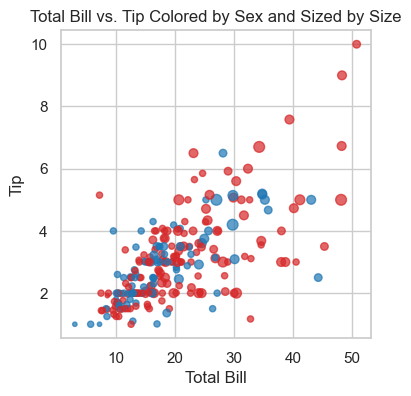

In [315]:
scatter_plot = plt.figure()
axes1 = scatter_plot.add_subplot(1,1,1)
axes1.scatter(
    x = tips['total_bill'],
    y = tips['tip'],
    s = tips['size'] * 10 , # 점 size 
    c = tips['sex_color'],  # 점 color
    alpha=0.7               # 점 투명도
    )

axes1.set_title("Total Bill vs. Tip Colored by Sex and Sized by Size")
axes1.set_xlabel('Total Bill')
axes1.set_ylabel('Tip')

plt.show()

## 03 **seaborn** 라이브러리 자유자재로 사용하기

### 단변량 그래프 그리기

#### ***히스토그램***

In [316]:
tips = sns.load_dataset('tips')

- subplot : 한 개 축 생성
- subplots : 여러개 축 생성

In [106]:
#ax = plt.subplots()

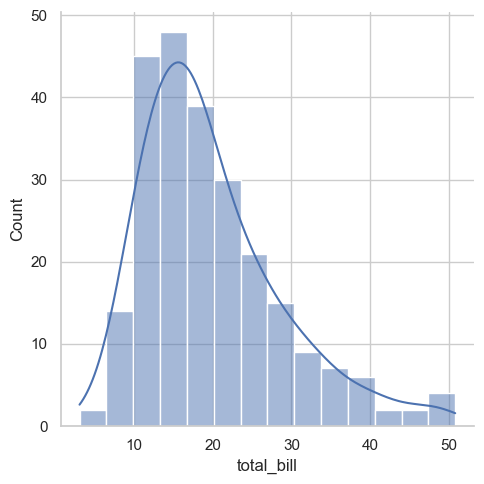

In [239]:
ax = sns.displot(tips['total_bill'], kde=True)   #kde:밀집도 그래프(선)
ax.set_titles('Total Bill Histogram with Desity Plot')
# Desity : 밀도

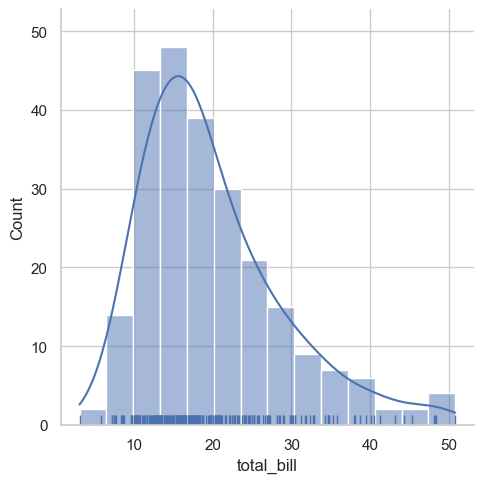

In [289]:
# rug 양탄자

ax = sns.displot(tips['total_bill'], kde=True, rug=True)   
ax.set_titles('Total Bill Histogram with Desity and Rug Plot')
#ax.set_xlabel('Total Bill')


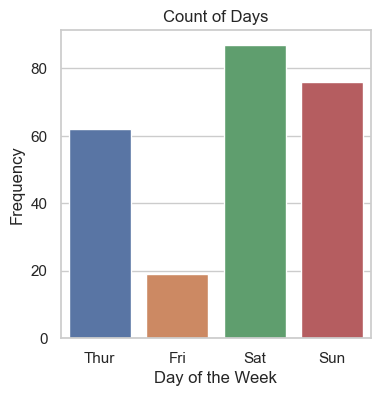

In [318]:
ax = sns.countplot(data=tips, x='day')
ax.set_title('Count of Days')
ax.set_xlabel('Day of the Week')
ax.set_ylabel('Frequency')
plt.show()

### 이변량 그래프 그리기

#### ***산점도 그래프***

Text(0, 0.5, 'Tip')

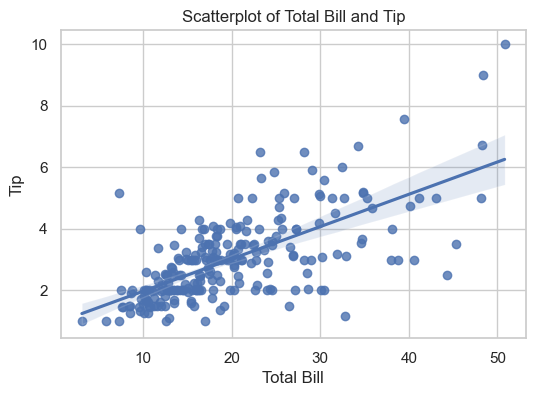

In [243]:
fig, ax = plt.subplots(figsize=(6,4))
ax = sns.regplot(x='total_bill',y='tip',data=tips)

ax.set_title('Scatterplot of Total Bill and Tip')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Tip')

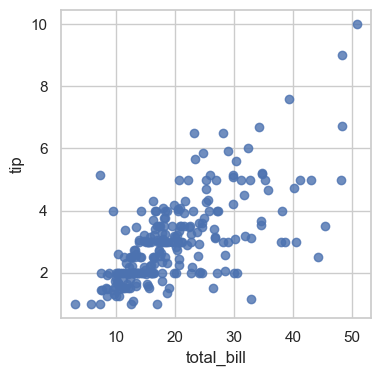

In [244]:
ax = sns.regplot(x='total_bill',y='tip',data=tips, fit_reg=False)

Text(0.5, 1.03, 'Joint Plot of Total Bill and Tip')

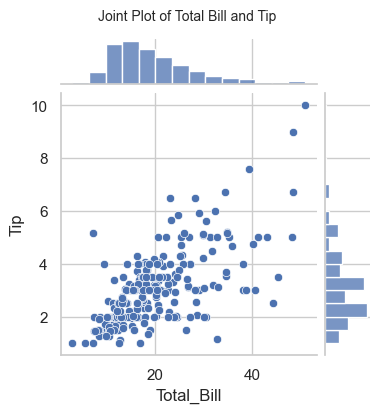

In [256]:
joint = sns.jointplot(x='total_bill', y='tip', data=tips, height=4)
joint.set_axis_labels(xlabel='Total_Bill', ylabel='Tip')
joint.fig.suptitle("Joint Plot of Total Bill and Tip", fontsize=10, y=1.03)

#### ***육각 그래프***

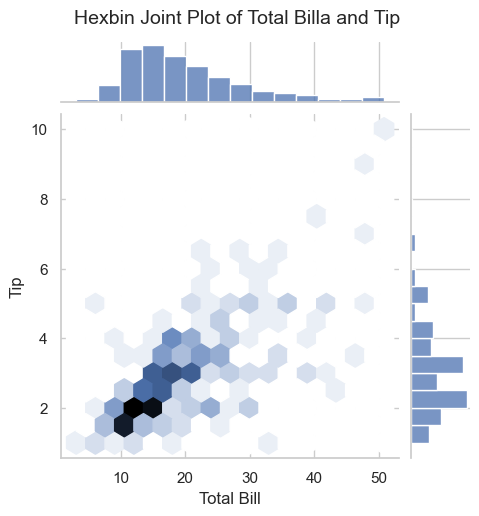

In [262]:
hexbin = sns.jointplot(x='total_bill',y='tip',data=tips, kind='hex',height=5)
hexbin.fig.suptitle('Hexbin Joint Plot of Total Billa and Tip', fontsize=14, y=1.03)
hexbin.set_axis_labels(xlabel='Total Bill', ylabel='Tip')

#### ***이차원 밀집도***

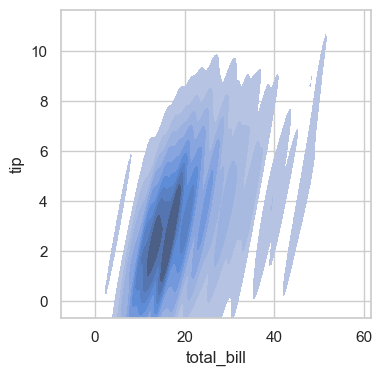

In [284]:
ax = plt.subplots()
ax = sns.kdeplot(x='total_bill',y='tip',data=tips, fill=True,)


#### ***바 그래프***

지정한 변수의 평균을 계산하여 그림


Text(0, 0.5, 'Average total bill')

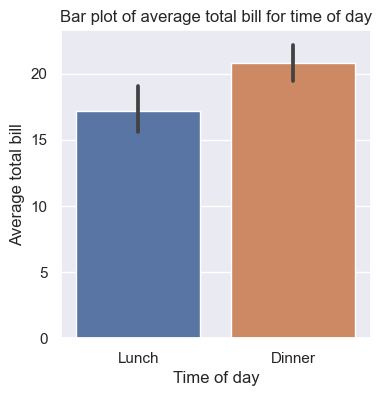

In [116]:
ax = sns.barplot(x='time', y='total_bill',data=tips)
ax.set_title('Bar plot of average total bill for time of day')
ax.set_xlabel('Time of day')
ax.set_ylabel('Average total bill')

#### ***박스 그래프***

Text(0, 0.5, 'Total Bill')

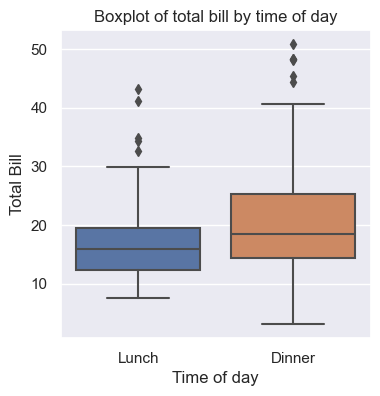

In [120]:
ax = sns.boxplot(x='time',y='total_bill', data=tips)
ax.set_title('Boxplot of total bill by time of day')
ax.set_xlabel('Time of day')
ax.set_ylabel('Total Bill')

#### ***바이올린 그래프***

Text(0, 0.5, 'Total Bill')

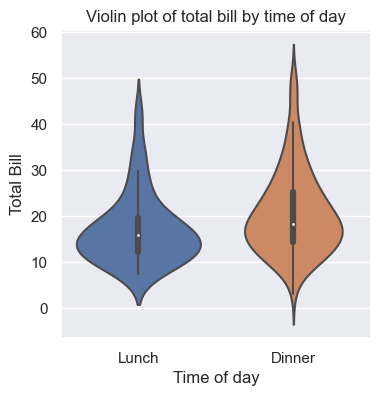

In [121]:
ax = sns.violinplot(x='time',y='total_bill', data=tips)
ax.set_title('Violin plot of total bill by time of day')
ax.set_xlabel('Time of day')
ax.set_ylabel('Total Bill')

#### ***관계 그래프***

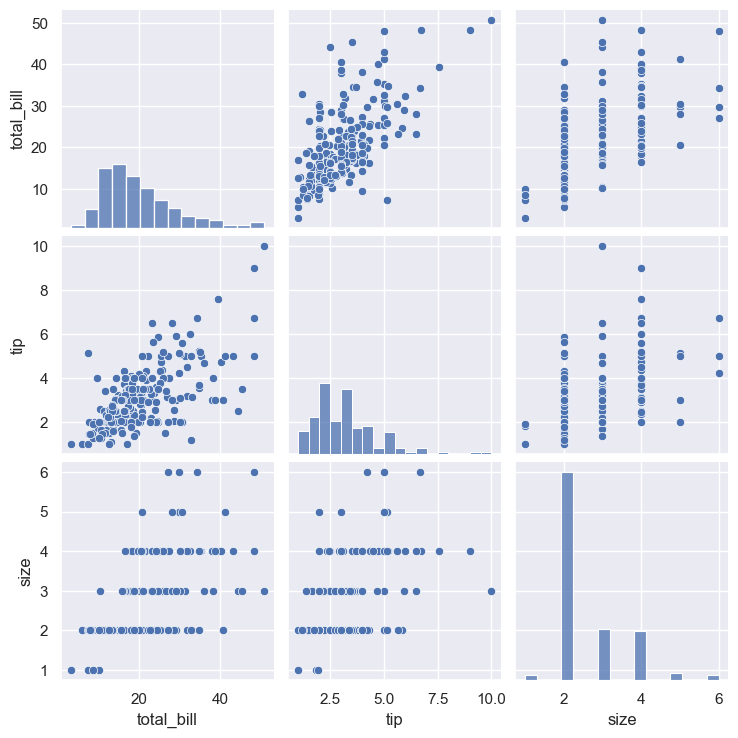

In [122]:
fig = sns.pairplot(tips)

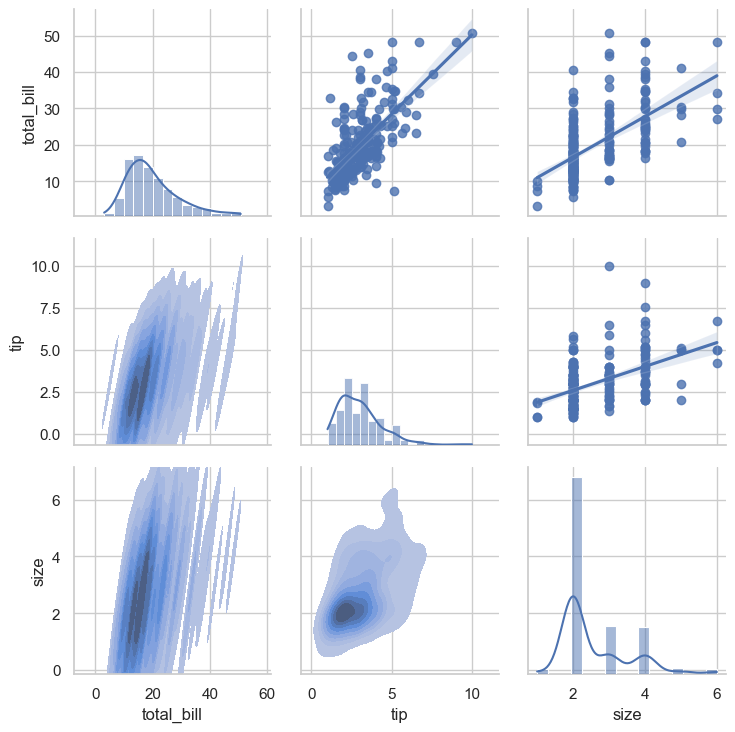

In [349]:
pair_grid = sns.PairGrid(tips)
pair_grid = pair_grid.map_upper(sns.regplot)
pair_grid = pair_grid.map_lower(sns.kdeplot,fill=True)
pair_grid = pair_grid.map_diag(sns.histplot,kde=True)
#pair_grid = pair_grid.map_diag(sns.distplot, rug=True)
plt.show()

### 다변량 그래프 그리기

#### ***바이올린 그래프*** - 색상 추가

hue : 그룹핑

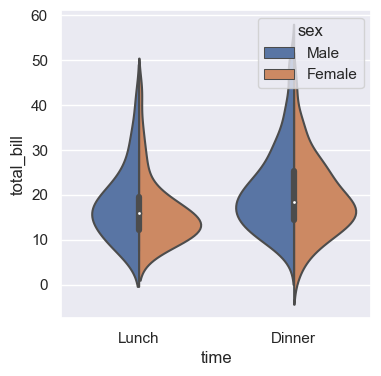

In [124]:
ax = sns.violinplot(x='time',y='total_bill',hue='sex',data=tips,split=True)

#### 산점도, 관계그래프 그리기 - 색상추가

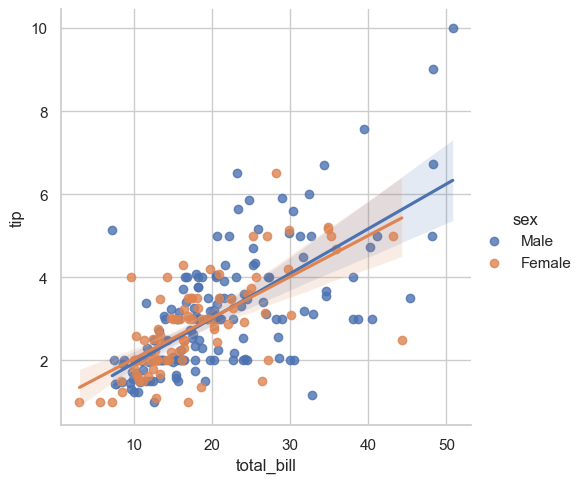

In [319]:
scatter = sns.lmplot(x='total_bill',y = 'tip',data=tips,hue='sex',fit_reg=True)

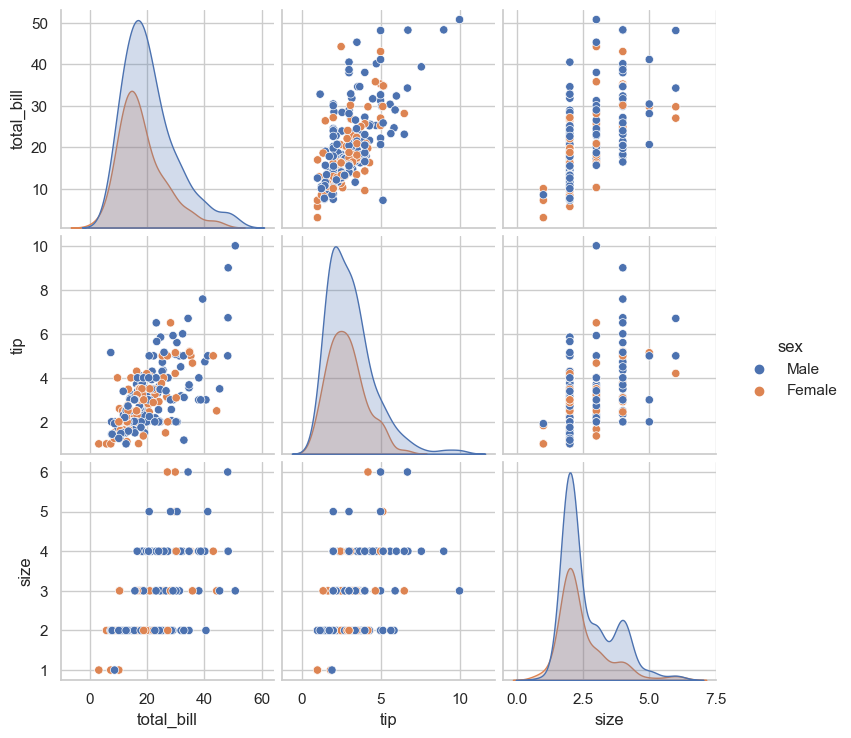

In [320]:
fig = sns.pairplot(tips, hue='sex')

#### 산점도 그래프의 크기와 모양 조절하기

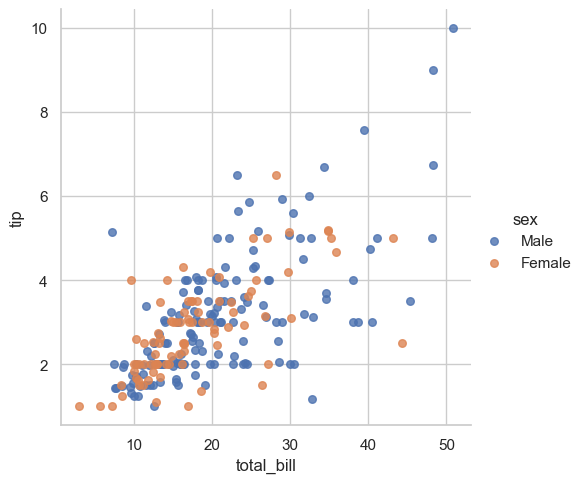

In [328]:
scatter = sns.lmplot(data=tips, x='total_bill',y = 'tip',fit_reg=False,hue='sex'
                     ,scatter_kws={'s' : 30})

In [330]:
ans = sns.load_dataset('anscombe')

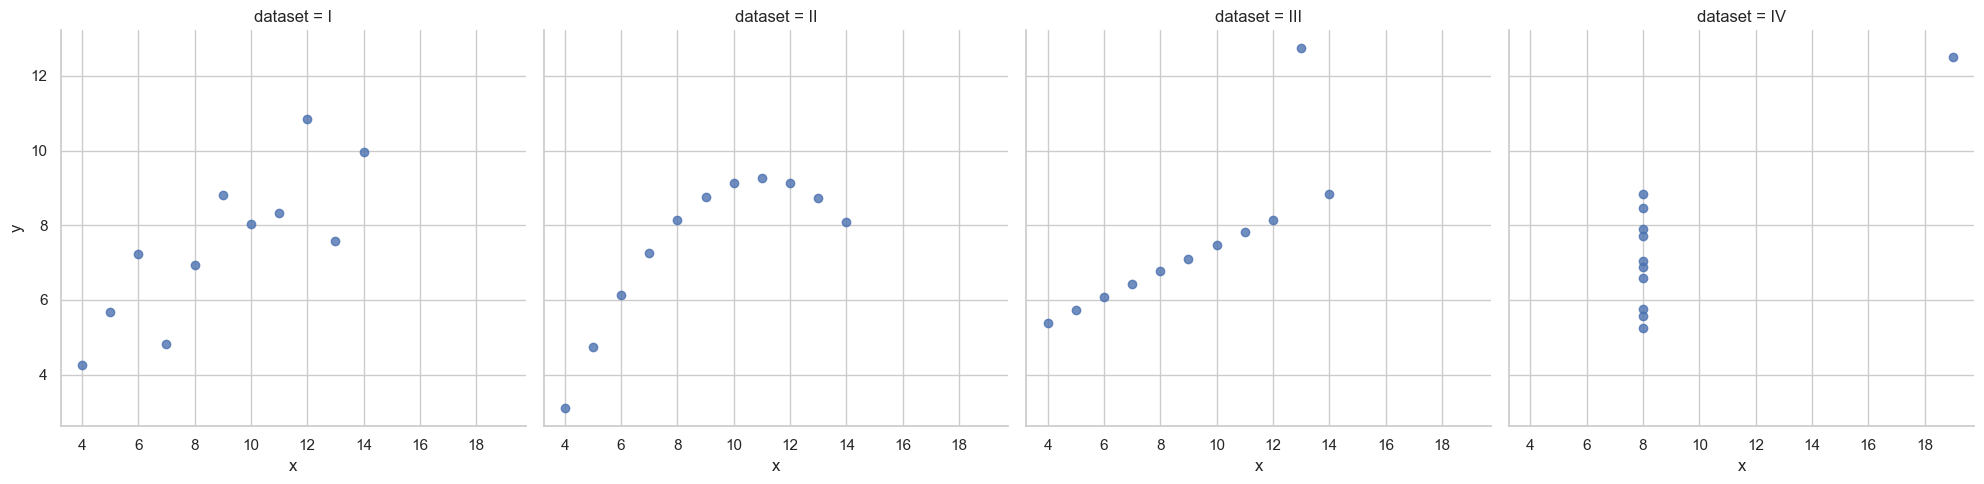

In [334]:
anscombe_plot = sns.lmplot(x='x',y='y', data=ans,fit_reg=False,
                           col='dataset',col_wrap=4)

## **CH04** 데이터프레임과 시리즈로 그래프 그리기

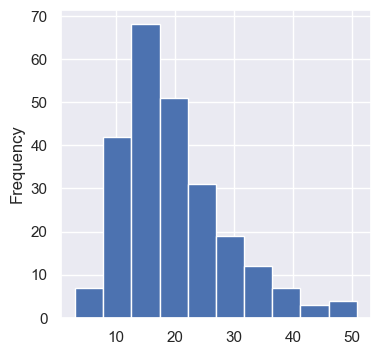

In [143]:
ax = tips['total_bill'].plot.hist()

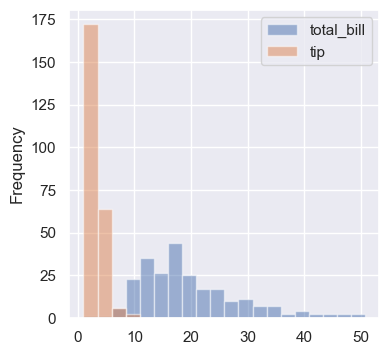

In [149]:
fig, ax = plt.subplots() # fig:도화지, ax: 축
ax = tips[['total_bill','tip']].plot.hist(alpha=0.5, bins=20, ax=ax)

In [350]:
#!pip install scipy

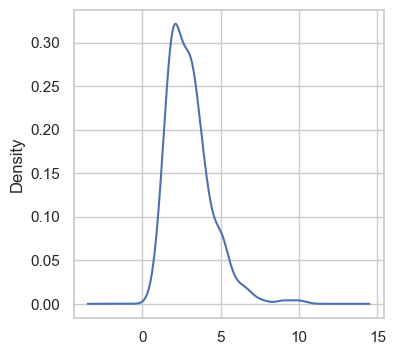

In [343]:
ax = plt.subplots()
ax = tips['tip'].plot.kde()

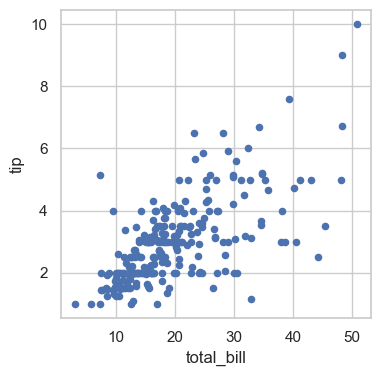

In [344]:
fig, ax = plt.subplots()
ax = tips.plot.scatter(x='total_bill',y='tip',ax=ax)

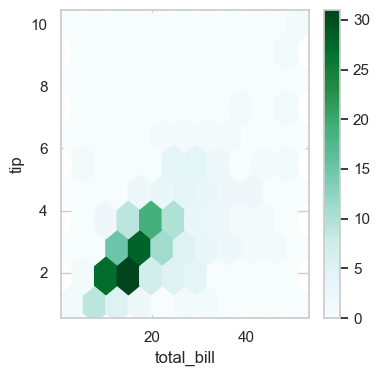

In [345]:
fig, ax = plt.subplots()
ax = tips.plot.hexbin(x='total_bill',y='tip',gridsize=10,ax=ax)

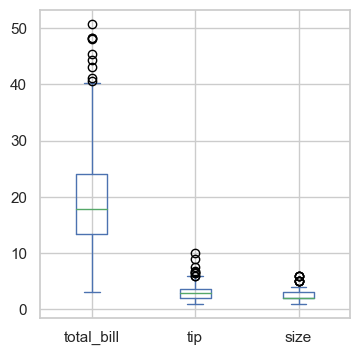

In [346]:
fig, ax = plt.subplots()
ax = tips.plot.box(ax=ax)

### 05 seaborn 라이브러리로 그래프 스타일 정하기

#### 그래프에 스타일 적용하기

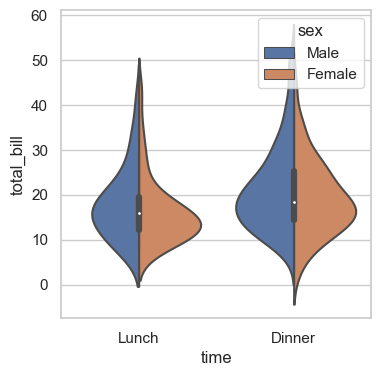

In [347]:
sns.set_style('whitegrid')  # 흰색 바탕에 가로줄
fig, ax = plt.subplots()
ax = sns.violinplot(x='time',y='total_bill',hue='sex',data=tips, split=True)

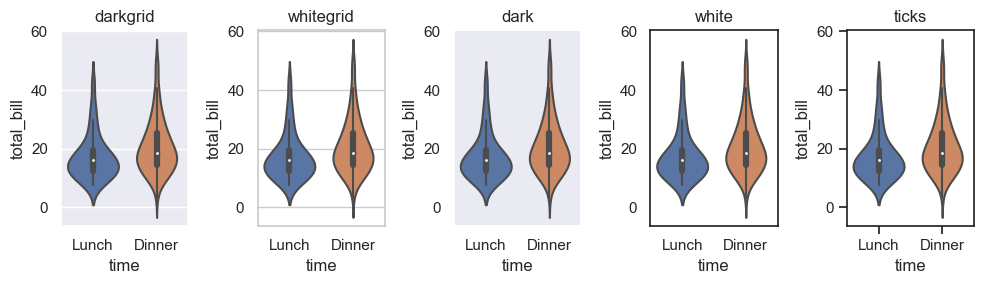

In [348]:
fig = plt.figure(figsize=(10,3))

seaborn_styles = ['darkgrid','whitegrid','dark','white','ticks']

for idx, style in enumerate(seaborn_styles):
    plot_position = idx + 1
    with sns.axes_style(style):
        ax = fig.add_subplot(1,5,plot_position)
        violin = sns.violinplot(x='time',y='total_bill',data=tips,ax=ax)
        violin.set_title(style)

fig.tight_layout()

---

# **CH05** 데이터 연결하기

## 01 분석하기 좋은 데이터

- 목적에 맞는 데이터

## 02 데이터 연결 기초

### 데이터 연결하기

#### **concat() 메서드로 데이터 연결하기**

concat 연결 : dataframe => 축 => 행축,열축

        - 행축 연결 : column명이 key
        - 열축 연결 : index가 key

concat()은 위에서 아래로 연결(행축)이 기본, 인덱스 그대로 유지

In [351]:
df1= pd.read_csv('../data/concat_1.csv')
df2= pd.read_csv('../data/concat_2.csv')
df3= pd.read_csv('../data/concat_3.csv')

In [167]:
df1

,A,B,C,D
0,a0,b0,c0,d0
1,a1,b1,c1,d1
2,a2,b2,c2,d2
3,a3,b3,c3,d3


In [168]:
df2

,A,B,C,D
0,a4,b4,c4,d4
1,a5,b5,c5,d5
2,a6,b6,c6,d6
3,a7,b7,c7,d7


In [166]:
row_concat = pd.concat([df1, df2, df3])
row_concat

,A,B,C,D
0,a0,b0,c0,d0
1,a1,b1,c1,d1
2,a2,b2,c2,d2
3,a3,b3,c3,d3
0,a4,b4,c4,d4
1,a5,b5,c5,d5
2,a6,b6,c6,d6
3,a7,b7,c7,d7
0,a8,b8,c8,d8
1,a9,b9,c9,d9


In [176]:
row_concat.iloc[3,]

A    a3
B    b3
C    c3
D    d3
Name: 3, dtype: object

In [175]:
row_concat.loc[3,]

,A,B,C,D
3,a3,b3,c3,d3
3,a7,b7,c7,d7
3,a11,b11,c11,d11


In [187]:
# 예시

data1 = pd.DataFrame({
    'A' : ['a1','a2'],
    'B' : ['b1','b2']
    },
    index=[1,2]
)
data1

,A,B
1,a1,b1
2,a2,b2


In [188]:
data2 = pd.DataFrame({
    'A' : ['a1','a2'],
    'B' : ['b1','b2'],
    'C' : ['c1','c2'],
    'D' : ['d1','d2']
})
data2

,A,B,C,D
0,a1,b1,c1,d1
1,a2,b2,c2,d2


In [189]:
# 행축 연결
pd.concat([data1,data2])

,A,B,C,D
1,a1,b1,NaN,NaN
2,a2,b2,NaN,NaN
0,a1,b1,c1,d1
1,a2,b2,c2,d2


In [190]:
# 열축 연결
pd.concat([data1,data2],axis=1)

,A,B,A,B,C,D
1,a1,b1,a2,b2,c2,d2
2,a2,b2,NaN,NaN,NaN,NaN
0,NaN,NaN,a1,b1,c1,d1


In [353]:
new_row_seires = pd.Series(['n1','n2','n3','n4'],name='A')

In [354]:
new_row_seires

0    n1
1    n2
2    n3
3    n4
Name: A, dtype: object

In [355]:
pd.concat([df1,new_row_seires],axis=1)

,A,B,C,D,A
0,a0,b0,c0,d0,n1
1,a1,b1,c1,d1,n2
2,a2,b2,c2,d2,n3
3,a3,b3,c3,d3,n4


In [356]:
pd.concat([df1,new_row_seires],axis=0)

,A,B,C,D,0
0,a0,b0,c0,d0,NaN
1,a1,b1,c1,d1,NaN
2,a2,b2,c2,d2,NaN
3,a3,b3,c3,d3,NaN
0,NaN,NaN,NaN,NaN,n1
1,NaN,NaN,NaN,NaN,n2
2,NaN,NaN,NaN,NaN,n3
3,NaN,NaN,NaN,NaN,n4


In [191]:
pd.concat([df1, new_row_seires],ignore_index=True) #ignore_index=True : 인덱스 초기화

,A,B,C,D,0
0,a0,b0,c0,d0,NaN
1,a1,b1,c1,d1,NaN
2,a2,b2,c2,d2,NaN
3,a3,b3,c3,d3,NaN
4,NaN,NaN,NaN,NaN,n1
5,NaN,NaN,NaN,NaN,n2
6,NaN,NaN,NaN,NaN,n3
7,NaN,NaN,NaN,NaN,n4


In [198]:
pd.DataFrame(
    ['a','b']
    )

,0
0,a
1,b


In [199]:
pd.DataFrame(
    [['a','b']]
    )

,0,1
0,a,b


In [192]:
# 열 1개로 구성된 데이터프레임 생성하여 연결하기

new_row_df = pd.DataFrame([['n1','n2','n3','n4']], columns=['A','B','C','D'])
new_row_df


,A,B,C,D
0,n1,n2,n3,n4


In [200]:
pd.concat([df1, new_row_df],axis=0)

,A,B,C,D
0,a0,b0,c0,d0
1,a1,b1,c1,d1
2,a2,b2,c2,d2
3,a3,b3,c3,d3
0,n1,n2,n3,n4


In [202]:
col_concat = pd.concat([df1,df2,df3],axis=1)

In [203]:
col_concat['A']

,A,A,A
0,a0,a4,a8
1,a1,a5,a9
2,a2,a6,a10
3,a3,a7,a11


In [205]:
col_concat['new_col'] = ['n1','n2','n3','n4']
col_concat

,A,B,C,D,A,B,C,D,A,B,C,D,new_col
0,a0,b0,c0,d0,a4,b4,c4,d4,a8,b8,c8,d8,n1
1,a1,b1,c1,d1,a5,b5,c5,d5,a9,b9,c9,d9,n2
2,a2,b2,c2,d2,a6,b6,c6,d6,a10,b10,c10,d10,n3
3,a3,b3,c3,d3,a7,b7,c7,d7,a11,b11,c11,d11,n4


In [206]:
col_concat_cp = col_concat.copy()
col_concat_cp['A'] = ['n1','n2','n3','n4']
col_concat_cp

,A,B,C,D,A,B,C,D,A,B,C,D,new_col
0,n1,b0,c0,d0,n1,b4,c4,d4,n1,b8,c8,d8,n1
1,n2,b1,c1,d1,n2,b5,c5,d5,n2,b9,c9,d9,n2
2,n3,b2,c2,d2,n3,b6,c6,d6,n3,b10,c10,d10,n3
3,n4,b3,c3,d3,n4,b7,c7,d7,n4,b11,c11,d11,n4


In [208]:
df2.columns = ['E','F','G','H']
df3.columns = ['A','C','F','H']

In [210]:
pd.concat([df1,df2,df3],axis=0)

,A,B,C,D,E,F,G,H
0,a0,b0,c0,d0,NaN,NaN,NaN,NaN
1,a1,b1,c1,d1,NaN,NaN,NaN,NaN
2,a2,b2,c2,d2,NaN,NaN,NaN,NaN
3,a3,b3,c3,d3,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,NaN,a4,b4,c4,d4
1,NaN,NaN,NaN,NaN,a5,b5,c5,d5
2,NaN,NaN,NaN,NaN,a6,b6,c6,d6
3,NaN,NaN,NaN,NaN,a7,b7,c7,d7
0,a8,NaN,b8,NaN,NaN,c8,NaN,d8
1,a9,NaN,b9,NaN,NaN,c9,NaN,d9


In [211]:
df1.columns, df2.columns, df3.columns

(Index(['A', 'B', 'C', 'D'], dtype='object'),
 Index(['E', 'F', 'G', 'H'], dtype='object'),
 Index(['A', 'C', 'F', 'H'], dtype='object'))

join의 default값 = outer

In [216]:
# inner join 

pd.concat([df1,df3], join='inner')

,A,C
0,a0,c0
1,a1,c1
2,a2,c2
3,a3,c3
0,a8,b8
1,a9,b9
2,a10,b10
3,a11,b11


In [217]:
df2.index=[4,5,6,7]
df3.index=[0,2,5,7]

In [219]:
pd.concat([df1,df3],axis=1,join='inner')

,A,B,C,D,A,C,F,H
0,a0,b0,c0,d0,a8,b8,c8,d8
2,a2,b2,c2,d2,a9,b9,c9,d9


In [222]:
# concat default 정리

pd.concat([df1,df2,df3]
            , axis=0, ignore_index=False, join='outer')

,A,B,C,D,E,F,G,H
0,a0,b0,c0,d0,NaN,NaN,NaN,NaN
1,a1,b1,c1,d1,NaN,NaN,NaN,NaN
2,a2,b2,c2,d2,NaN,NaN,NaN,NaN
3,a3,b3,c3,d3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,a4,b4,c4,d4
5,NaN,NaN,NaN,NaN,a5,b5,c5,d5
6,NaN,NaN,NaN,NaN,a6,b6,c6,d6
7,NaN,NaN,NaN,NaN,a7,b7,c7,d7
0,a8,NaN,b8,NaN,NaN,c8,NaN,d8
2,a9,NaN,b9,NaN,NaN,c9,NaN,d9


## 03 데이터 연결 마무리

### **merge 메서드**

In [225]:
person = pd.read_csv('../data/survey_person.csv')
site = pd.read_csv('../data/survey_site.csv')
survey = pd.read_csv('../data/survey_survey.csv')
visited = pd.read_csv('../data/survey_visited.csv')

In [226]:
person

,ident,personal,family
0,dyer,William,Dyer
1,pb,Frank,Pabodie
2,lake,Anderson,Lake
3,roe,Valentina,Roerich
4,danforth,Frank,Danforth


In [227]:
visited

,ident,site,dated
0,619,DR-1,1927-02-08
1,622,DR-1,1927-02-10
2,734,DR-3,1939-01-07
3,735,DR-3,1930-01-12
4,751,DR-3,1930-02-26
5,752,DR-3,NaN
6,837,MSK-4,1932-01-14
7,844,DR-1,1932-03-22


In [229]:
survey.head()

,taken,person,quant,reading
0,619,dyer,rad,9.82
1,619,dyer,sal,0.13
2,622,dyer,rad,7.80
3,622,dyer,sal,0.09
4,734,pb,rad,8.41


In [232]:
visited_subset = visited.loc[[0,2,6],]
visited_subset

,ident,site,dated
0,619,DR-1,1927-02-08
2,734,DR-3,1939-01-07
6,837,MSK-4,1932-01-14
